# EDA of User Behavior and Device Usage Patterns

This dataset is used to understand user behavior and patterns of mobile device usage. Key Features:

- User ID: Unique identifier for each user.
- Device Model: Model of the user's smartphone.
- Operating System: The OS of the device (iOS or Android).
- App Usage Time: Daily time spent on mobile applications, measured in minutes.
- Screen On Time: Average hours per day the screen is active.
- Battery Drain: Daily battery consumption in mAh.
- Number of Apps Installed: Total apps available on the device.
- Data Usage: Daily mobile data consumption in megabytes.
- Age: Age of the user.
- Gender: Gender of the user (Male or Female).
- User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).

### Import Library

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [3]:
# Load the dataset and inspect its structure to understand available features.
file_path = '/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for an initial overview
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


### Check for Missing Values and Basic Statistics

In [5]:
# Check for any missing values in the dataset.
missing_values = data.isnull().sum()

# Display missing values
missing_values

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [6]:
# generate summary statistics for numerical columns.
stats_summary = data.describe()

# Display summary statistics
stats_summary

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


### Data Distribution Analysis

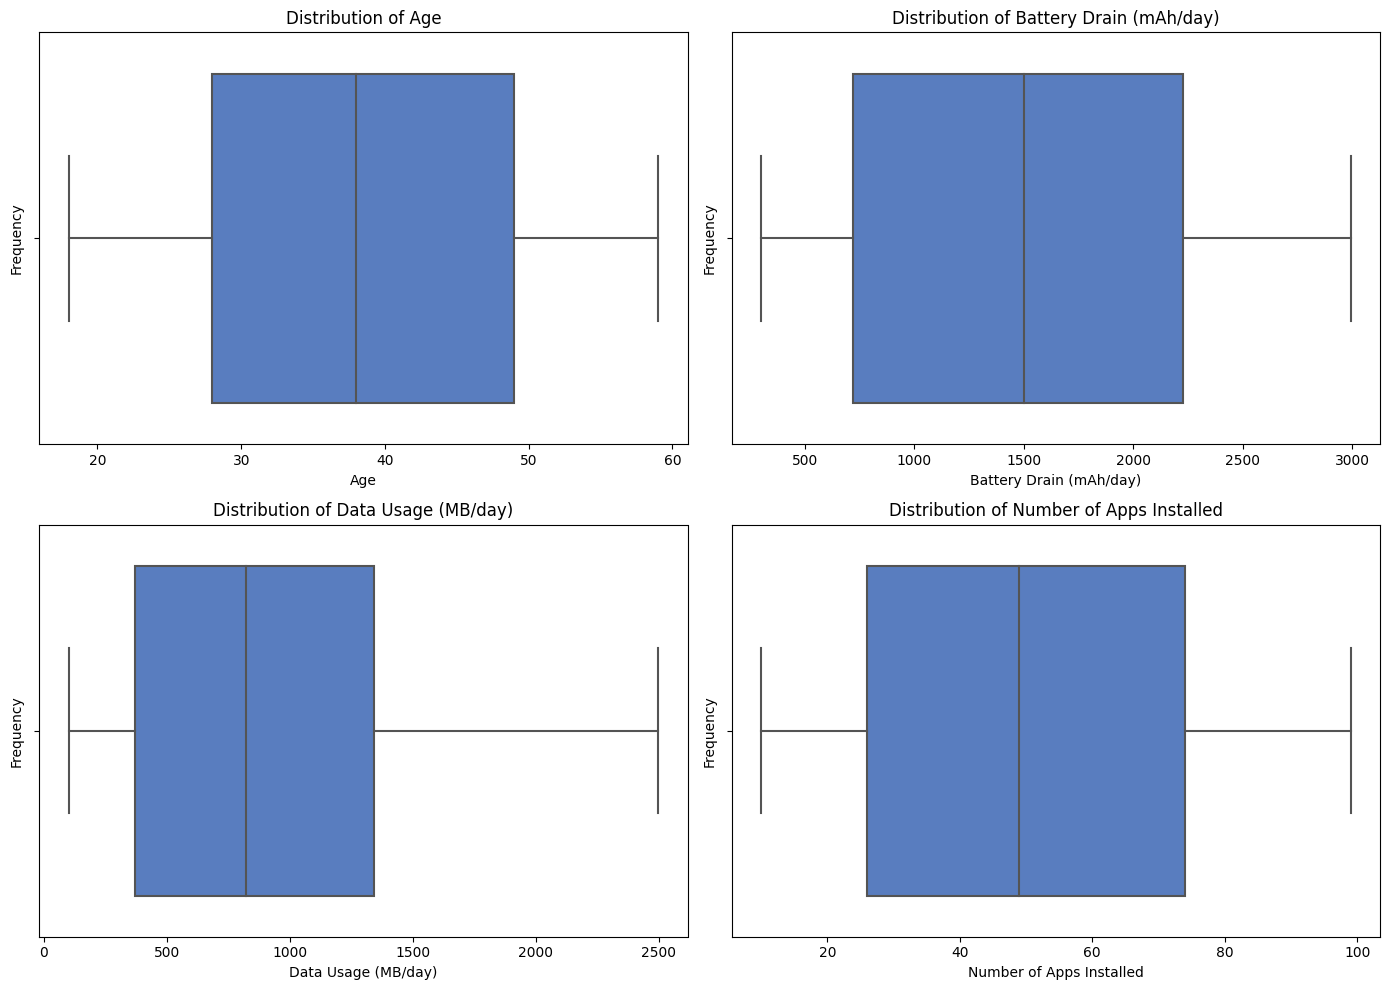

In [40]:
# Plot histograms for key variables to understand their distribution.
# Define features for visualization
features = ['Age','Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Number of Apps Installed']

# Plot boxplots for each feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x=feature, palette='muted')  # Menambahkan warna dengan palet muted
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the analysis of the data presented in the diagram, we can draw several conclusions regarding mobile device user behavior:

1. User Age The majority of mobile device users in this dataset are between 20 and 60 years old. The average age of users is around 38 years, indicating that most users fall within the adult age group.

2. Daily Battery Usage Daily battery usage varies between 300 and 3000 mAh, with an average usage of around 1500 mAh. This suggests that most users consume a moderate amount of battery power each day, although some users consume more, possibly due to more intensive use of their devices.

3. Daily Data Usage Daily data usage by mobile device users ranges from 100 to 2500 MB, with an average usage of around 900 MB. This indicates that most users use a moderate amount of data, although there are users with higher data usage.

4. Number of Installed Applications The number of applications installed on users' devices ranges from 10 to 100 applications, with an average of around 50 applications. This indicates that the majority of users have a large number of installed applications, reflecting various needs and preferences in using mobile devices.

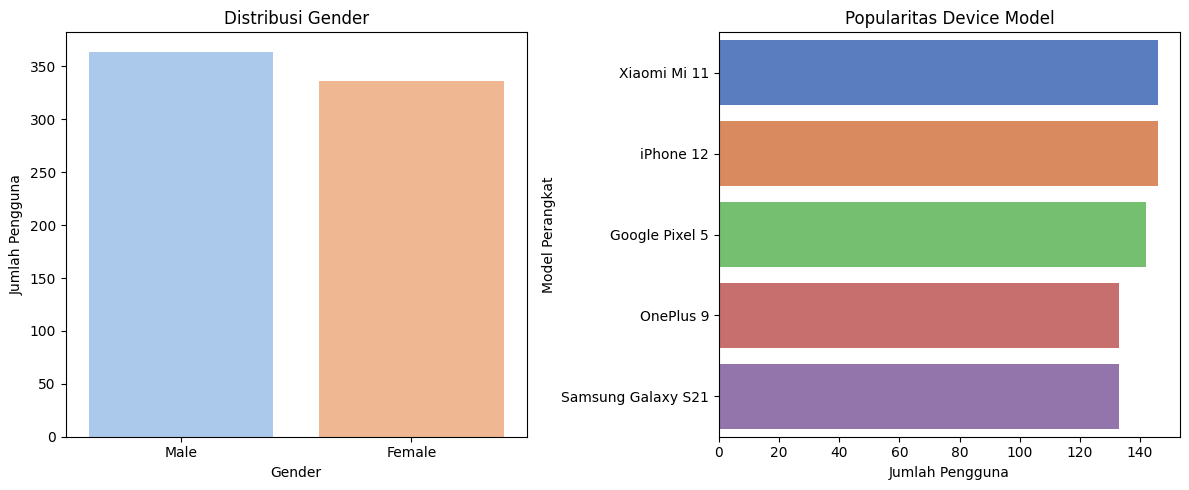

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Gender', palette='pastel')
plt.title('Distribusi Gender')
plt.ylabel('Jumlah Pengguna')
plt.xlabel('Gender')

plt.subplot(1, 2, 2)
sns.countplot(data=data, y='Device Model', palette='muted', order=data['Device Model'].value_counts().index)
plt.title('Popularitas Device Model')
plt.ylabel('Model Perangkat')
plt.xlabel('Jumlah Pengguna')

plt.tight_layout()
plt.show()

From the diagram above, we can conclude the following:

1. Gender Distribution of Users From the diagram, it can be seen that the number of male mobile device users is higher compared to female users. This indicates that the majority of users in this dataset are male, which may reflect preferences or usage habits of mobile devices among certain genders.

2. Popularity of Device Models Most mobile device users are using the Xiaomi Mi 11 and iPhone 12 models, each with approximately 140 users. These two models show high popularity among users, possibly influenced by factors such as quality, price, and features offered by the devices.

### Analysis of Relationships Between Key Features

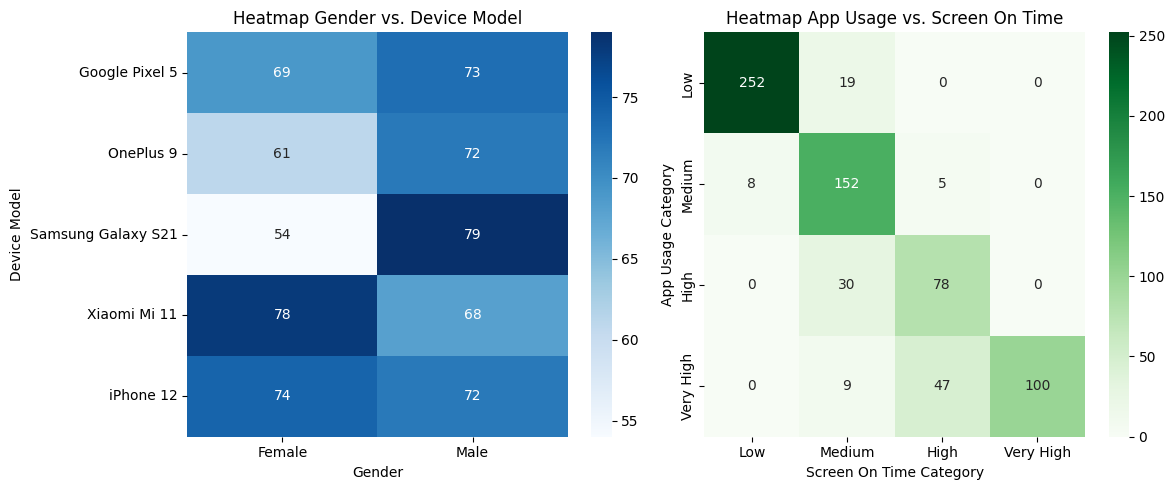

In [33]:
# Heatmap 1: Gender vs. Device Model
heatmap_data1 = pd.crosstab(data['Device Model'], data['Gender'])

# Heatmap 2: App Usage Time (dikelompokkan) vs. Screen On Time (dikelompokkan)
# Membuat kategori untuk App Usage Time dan Screen On Time
data['App Usage Category'] = pd.cut(data['App Usage Time (min/day)'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
data['Screen On Time Category'] = pd.cut(data['Screen On Time (hours/day)'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

heatmap_data2 = pd.crosstab(data['App Usage Category'], data['Screen On Time Category'])

# Membuat plot
plt.figure(figsize=(12, 5))

# Subplot 1: Heatmap Gender vs. Device Model
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data1, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap Gender vs. Device Model')
plt.ylabel('Device Model')
plt.xlabel('Gender')

# Subplot 2: Heatmap App Usage vs. Screen On Time
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data2, annot=True, cmap='Greens', fmt='d')
plt.title('Heatmap App Usage vs. Screen On Time')
plt.ylabel('App Usage Category')
plt.xlabel('Screen On Time Category')

# Menyesuaikan tata letak
plt.tight_layout()

# Menampilkan plot
plt.show()

Based on the analysis of the heatmap, we can draw the following conclusions:

1. Gender Distribution Across Device Models:
    - The Samsung Galaxy S21 is predominantly used by male users, with 79 male users compared to fewer female users (54).
    - The Xiaomi Mi 11 is the most popular device among female users, suggesting a higher preference for this model among women.
    - The iPhone 12 shows a nearly equal distribution between male and female users, with 72 male users and 74 female users, indicating balanced popularity among both genders.
2. App Usage vs. Screen On Time:
    - Most users with low screen on time also have low app usage, with a total of 252 users falling into this category. A small number of users with low screen on time show medium app usage, indicating that while many users spend little time on their devices, a few still engage with apps moderately.
    - For users with medium screen on time, medium app usage is the most common pattern, with 152 users in this group, showing a moderate level of device engagement.
    - Among users with high screen on time, there is a trend of high app usage, with 78 users fitting into this category, indicating a strong correlation between screen time and app usage for more engaged users. 
    - Users with very high screen on time typically exhibit very high app usage, with 100 users showing this pattern, reflecting high device engagement in both time and app usage.

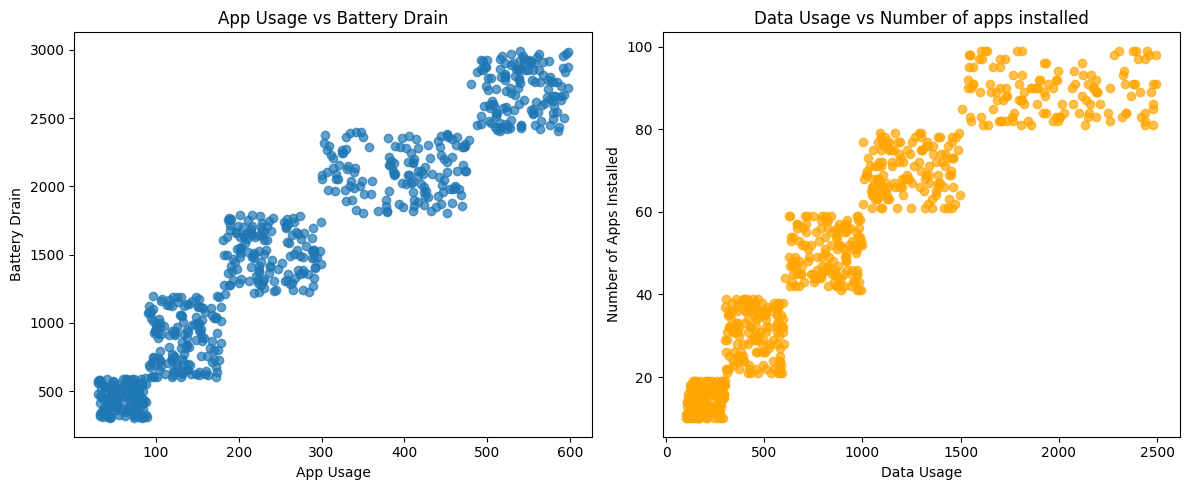

In [41]:
plt.figure(figsize=(12, 5))

# App Usage vs Battery Drain
plt.subplot(1, 2, 1)
plt.scatter(data['App Usage Time (min/day)'], data['Battery Drain (mAh/day)'], alpha=0.7)
plt.title('App Usage vs Battery Drain')
plt.xlabel('App Usage')
plt.ylabel('Battery Drain')

# Data Usage vs Number of apps installed
plt.subplot(1, 2, 2)
plt.scatter(data['Data Usage (MB/day)'], data['Number of Apps Installed'], alpha=0.7, color='orange')
plt.title('Data Usage vs Number of apps installed')
plt.xlabel('Data Usage')
plt.ylabel('Number of Apps Installed')

plt.tight_layout()
plt.show()

Based on the scatter plots in the image, the following relationships can be observed:

1. App Usage vs. Battery Drain:
   There is a strong positive correlation between app usage and battery drain. As the amount of app usage increases, the battery drain also increases. This is expected, as using apps for extended periods typically consumes more power from the device's battery. The data suggests that users who spend more time using apps tend to experience higher battery consumption.
2. Data Usage vs. Number of Apps Installed (Right Plot):
    Similarly, there is a positive correlation between data usage and the number of apps installed. As the number of apps installed increases, so does the amount of data usage. This relationship implies that users with more apps on their devices may engage in more online activities, which leads to higher data consumption.

### Conclusion

 1. User Behavior Based on Device Type: Samsung Galaxy S21 users are predominantly male, while female users are more inclined to use the Xiaomi Mi 11. iPhone 12 users tend to be balanced between males and females.
2. Relationship Between Screen Time and App Usage: The correlation between screen time and app usage shows that users with low screen time generally have low app usage, and conversely, users with high screen time have high app usage.
3. App Usage and Battery Drain: There is a strong positive correlation between app usage and battery drain, indicating that the longer the app usage, the more battery power is consumed.
4. Data Usage and Number of Installed Apps:There is a positive correlation between data usage and the number of installed apps, showing that the more apps installed on a device, the more data is used.ata is used.